In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import assemble
import time

In [6]:
# Create a quantum circuit with 3 qubits
n = 5
ghz_circuit = QuantumCircuit(n)

# Apply a Hadamard gate to the first qubit
ghz_circuit.h(0)

# Apply a series of CNOT gates to create entanglement
for qubit in range(n - 1):
    ghz_circuit.cx(qubit, qubit + 1)

# Measure all qubits
ghz_circuit.measure_all()

Execution time: 0.00739598274230957 seconds


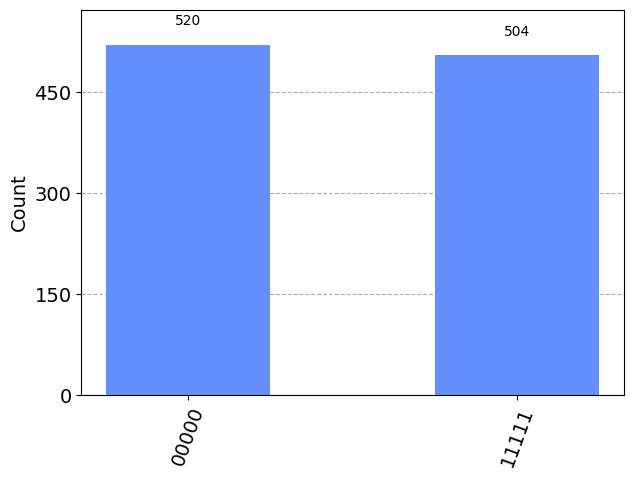

In [7]:
start_time = time.time()

# Simulate the circuit
simulator = AerSimulator()

compiled_circuit = transpile(ghz_circuit, simulator)
job = simulator.run(compiled_circuit)

# Get the results
result = job.result()
counts = result.get_counts(ghz_circuit)

end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

# Plot the histogram of measurement outcomes
plot_histogram(counts)

Execution time: 0.0073206424713134766 seconds


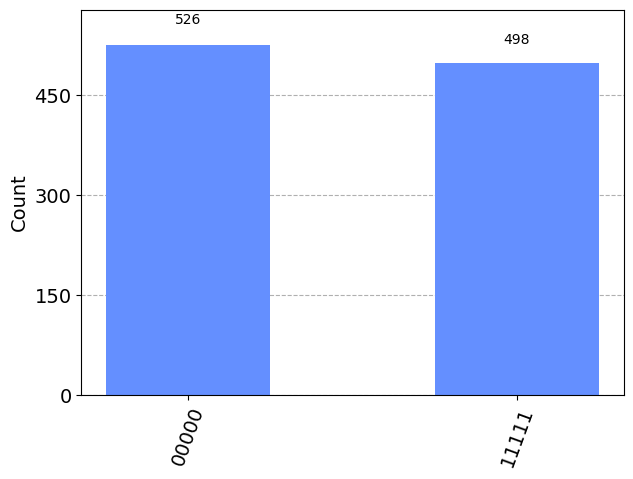

In [8]:
start_time = time.time()

# Simulate the circuit
simulator = AerSimulator(method='statevector', device='GPU', cuStateVec_enable=True)

compiled_circuit = transpile(ghz_circuit, simulator)
job = simulator.run(compiled_circuit)

# Get the results
result = job.result()
counts = result.get_counts(ghz_circuit)

end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

# Plot the histogram of measurement outcomes
plot_histogram(counts)